In [1]:
%matplotlib inline

# Bokeh for interactive, Seaborn for static

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(style="whitegrid", palette="pastel")

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from math import pi
import glob

In [2]:
fsm01_param_files = '../experiments/fsm-0-1/seed*/outcmaesxrecentbest.dat'
bnn01_param_files = '../experiments/bnn-0-1/seed*/outcmaesxrecentbest.dat'

# fsm302_param_files = '../experiments/fsm-30-2/seed*/outcmaesxrecentbest.dat'
# bnn302_param_files = '../experiments/bnn-30-2/seed*/outcmaesxrecentbest.dat'

fsm302_param_files = '../experiments/fsm-40-2/seed*/outcmaesxrecentbest.dat'
bnn302_param_files = '../experiments/bnn-40-2/seed*/outcmaesxrecentbest.dat'

def range_transform(x, a, b, c, d):
    return (x - a) * (d - c) / (b - a) + c

def get_data_from_file(glob_dir, header):
    data = []
    for pop_filepath in sorted(glob.iglob(glob_dir, recursive=True)):
        data.append(pd.read_csv(pop_filepath, comment='%', header=None, names=header, sep=' '))
        data[-1]['fitness'] = (data[-1]['fitness'] * -1) + 1
    return data


cmaes_header = ['iter', 'evals', 'sigma', '0', 'fitness']
fsm_header = cmaes_header + ['param' + str(i)  for i in range(15)]
bnn_header = cmaes_header + ['param' + str(i)  for i in range(17)]


fsm01_replicates = get_data_from_file(fsm01_param_files, fsm_header)
print('Found', len(fsm01_replicates), 'data files in', fsm01_param_files)

fsm302_replicates = get_data_from_file(fsm302_param_files, fsm_header)
print('Found', len(fsm302_replicates), 'data files in', fsm302_param_files)


bnn01_replicates = get_data_from_file(bnn01_param_files, bnn_header)
print('Found', len(bnn01_replicates), 'data files in', bnn01_param_files)

bnn302_replicates = get_data_from_file(bnn302_param_files, bnn_header)
print('Found', len(bnn302_replicates), 'data files in', bnn302_param_files)

Found 20 data files in ../experiments/fsm-0-1/seed*/outcmaesxrecentbest.dat
Found 20 data files in ../experiments/fsm-40-2/seed*/outcmaesxrecentbest.dat
Found 20 data files in ../experiments/bnn-0-1/seed*/outcmaesxrecentbest.dat
Found 20 data files in ../experiments/bnn-40-2/seed*/outcmaesxrecentbest.dat


/Users/ajc/miniconda3/envs/RoboND/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


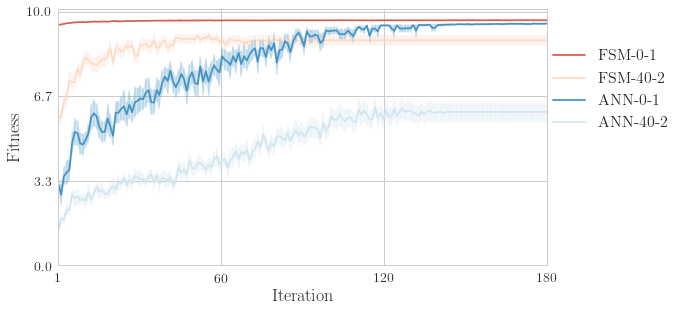

In [3]:
def plot_generational_fitness(dfs, col, name, color):
    data = np.zeros((len(dfs), 2000))

    for i, r in enumerate(dfs):
        data[i, :len(r[col])] = r[col]
        data[i, len(r[col]):] = r[col].iloc[-1]
    # unit_traces is very useful (ci_band and ci_bars are 1 std by default (68%))
    return sns.tsplot(data=data, 
                      color=color, condition=name, ax=ax,
                      err_style=('ci_band', 'ci_bars'))


fsize = 16/2, 9/2
fig, ax = plt.subplots(figsize=fsize)
colors = sns.color_palette("RdBu", n_colors=4)

plot_generational_fitness(fsm01_replicates, 'fitness', 'FSM-0-1', colors[0])
plot_generational_fitness(fsm302_replicates, 'fitness', 'FSM-40-2', colors[1])
plot_generational_fitness(bnn01_replicates, 'fitness', 'ANN-0-1', colors[3])
plot_generational_fitness(bnn302_replicates, 'fitness', 'ANN-40-2', colors[2])

gens = 180
ax.set_xlim((0, gens-1))

xticks = np.linspace(0, gens-1, 4)
ax.set_xticks(xticks)
ax.set_xticklabels([int(xval + 1) for xval in xticks], fontsize=14)
ax.set_xlabel('Iteration', fontsize=18)
ax.set_xlim([0, gens - 1])

yticks = np.linspace(0, 10, num=4)
ax.set_yticks(yticks)
ax.set_yticklabels([round(yval, 1) for yval in yticks], fontsize=14)
ax.set_ylabel('Fitness', fontsize=18)

# sns.despine(top=True, bottom=True, left=True, right=True)
# sns.despine(top=True, left=True)
plt.tight_layout()

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=(1, 0.5), fontsize=16)#, bbox_to_anchor=(0.5,-0.1))

In [20]:
fig.savefig('fitness.png', bbox_extra_artists=(lgd,), bbox_inches='tight')